# ALS HD Height Above Ground Level Demo

Notebook creator: Sina Zumstein & Hannah Weiser, 2023

This demo scene uses a digital terrain model (DTM) of Heidelberg, Germany, which will be scanned by airborne laser scanning (ALS) maintaining a constant height above ground. We will use the command-line access of HELIOS++ to run the simulation, and use Python just for displaying the input XMLs and the resulting point clouds.

In [2]:
from pathlib import Path
from IPython.display import Code
from pyhelios.util.xmldisplayer import display_xml, find_playback_dir

In [1]:
import os
os.chdir("..")

## Survey
Let us look at the XML files in the simulation. First, we investigate the **survey** XML file, `als_hd_height_above_ground_stripid.xml`:

In [3]:
Code(display_xml('data/surveys/demo/als_hd_height_above_ground_stripid.xml'), language='XML')

<document>
    <scannerSettings id="als_settings" active="true" pulseFreq_hz="83000" scanAngle_deg="30" scanFreq_hz="50" headRotatePerSec_deg="0.0" headRotateStart_deg="0.0" headRotateStop_deg="0.0" trajectoryTimeInterval_s="0.067" />
    <survey name="hdb_stripid5" platform="data/platforms.xml#sr22" scanner="data/scanners_als.xml#leica_als50" scene="data/scenes/demo/hd_demo.xml#hd_demo">
        <leg stripId="0">
            <platformSettings x="477280.4197453116" y="5472582.624303755" z="1619.0" movePerSec_m="250" />
            <scannerSettings template="als_settings" />
        </leg>
        <leg stripId="0">
            <platformSettings x="477899.24983534013" y="5472584.19493851" z="1658.0" movePerSec_m="250" />
            <scannerSettings template="als_settings" />
        </leg>
        <leg stripId="0">
            <platformSettings x="478029.5298542935" y="5472584.525598458" z="1693.0" movePerSec_m="250" />
            <scannerSettings template="als_settings" />
        </leg>
        <leg stripId="0">
            <platformSettings x="478159.8098732469" y="5472584.856258406" z="1731.0" movePerSec_m="250" />
            <scannerSettings template="als_settings" />
        </leg>
        <leg stripId="0">
            <platformSettings x="478257.5198874619" y="5472585.1042533675" z="1766.0" movePerSec_m="250" />
            <scannerSettings template="als_settings" />
        </leg>
        <leg stripId="0">
            <platformSettings x="478452.93991589197" y="5472585.60024329" z="1804.0" movePerSec_m="250" />
            <scannerSettings template="als_settings" />
        </leg>
        <leg stripId="0">
            <platformSettings x="478713.4999537987" y="5472586.2615631865" z="1767.0" movePerSec_m="250" />
            <scannerSettings template="als_settings" />
        </leg>
        <leg stripId="0">
            <platformSettings x="478843.7799727521" y="5472586.592223135" z="1732.0" movePerSec_m="250" />
            <scannerSettings template="als_settings" />
        </leg>
        <leg stripId="0">
            <platformSettings x="479234.6200296122" y="5472587.58420298" z="1765.0" movePerSec_m="250" />
            <scannerSettings template="als_settings" />
        </leg>
        <leg stripId="0">
            <platformSettings x="479397.4700533039" y="5472587.997527915" z="1802.0" movePerSec_m="250" />
            <scannerSettings template="als_settings" />
        </leg>
        <leg stripId="0">
            <platformSettings x="479560.32007699565" y="5472588.41085285" z="1833.0" movePerSec_m="250" />
            <scannerSettings template="als_settings" />
        </leg>
        <leg stripId="0">
            <platformSettings x="479625.46008647233" y="5472588.576182825" z="1880.0" movePerSec_m="250" />
            <scannerSettings template="als_settings" />
        </leg>
        <leg stripId="0">
            <platformSettings x="479723.17010068736" y="5472588.824177786" z="1911.0" movePerSec_m="250" />
            <scannerSettings template="als_settings" />
        </leg>
        <leg stripId="0">
            <platformSettings x="479886.0201243791" y="5472589.237502721" z="1942.0" movePerSec_m="250" />
            <scannerSettings template="als_settings" />
        </leg>
        <leg stripId="0">
            <platformSettings x="480048.8701480708" y="5472589.6508276565" z="1987.0" movePerSec_m="250" />
            <scannerSettings template="als_settings" />
        </leg>
        <leg stripId="0">
            <platformSettings x="480179.15016702417" y="5472589.981487605" z="2023.0" movePerSec_m="250" />
            <scannerSettings template="als_settings" />
        </leg>
        <leg stripId="0">
            <platformSettings x="480537.4202191483" y="5472590.89080242" z="2023.0" movePerSec_m="250" />
            <scannerSettings template="als_settings" active="false" />
        </leg>
        <leg stripId="1">
            <platformSettings x="480553.9532164774" y="5473285.276690253" z="1856.0" movePerSec

There are many `leg` elements which define the waypoints of the airplane trajectory with `x`, `y`, `z` coordinates and the speed between the waypoints (`movePerSec_m`). 

The reason for using so many waypoints is to make the virtual airplane hold a constant height above the terrain, which is a typical scenario in real ALS (or ULS) campaigns. Here, we see that `z` is ranging from 1607.0 m to 2023.0 m. The `stripId` parameter is used to group the many small segments to the larger flight strips. For all segments with the same `stripId`, only one trajectory and one point cloud file will be written. In total, there are three flight strips with the IDs 0, 1, and 2.

As a platform, the `sr22` airplane is used. The scanner is a `leica_als50`. 

In the beginning of the XML, a `scannerSettings` template with the id `als_settings` is defined, which all `leg`s are using. Only in a few of them, the `active` attribute is overwritten to "false". The scanner settings include the `pulseFreq_hz`, the `scanAngle_deg`, and the `scanFreq_hz`. The `trajectoryTimeInterval_s` controls the time step between the points written to the trajectory file ([Wiki: ASCII trajectory format](https://github.com/3dgeo-heidelberg/helios/wiki/Output#ascii-trajectory-format)).

## Platform and Scanner

In [4]:
Code(display_xml('data/platforms.xml', 'sr22'))

<platform id="sr22" name="Cirrus SR-22" type="linearpath">
		<scannerMount z="0.7">
			<rot axis="x" angle_deg="-90" />
			<rot axis="z" angle_deg="90" />
		</scannerMount>
		<!--<positionXNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="1"
			type="NORMAL" mean="0.0" stdev="0.02"/>
		<positionYNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="1"
			type="NORMAL" mean="0.0" stdev="0.02"/>
		<positionZNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="1"
			type="NORMAL" mean="0.0" stdev="0.02"/>
		<attitudeXNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="1"
			type="NORMAL" mean="0.0" stdev="0.001"/>
		<attitudeYNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="1"
			type="NORMAL" mean="0.0" stdev="0.001"/>
		<attitudeZNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="1"
			type="NORMAL" mean="0.0" stdev="0.001"/>-->
	</platform>

In [5]:
Code(display_xml('data/scanners_als.xml', 'leica_als50'), language='XML')

<scanner id="leica_als50" accuracy_m="0.05" beamDivergence_rad="0.00033" name="Leica ALS50" optics="oscillating" pulseFreqs_Hz="83000" pulseLength_ns="10" rangeMin_m="200" scanAngleMax_deg="37.5" scanFreqMin_Hz="25" scanFreqMax_Hz="70" />

## Scene

Now we will have a look at the scene, `hd_demo.xml`in `data/scenes/demo/hd_demo.xml`:

In [6]:
Code(display_xml('data/scenes/demo/hd_demo.xml', 'hd_demo'))

<scene id="hd_demo" name="Heidelberg">
        <part>
            <filter type="geotiffloader">
                <param type="string" key="filepath" value="data/sceneparts/tiff/dem_hd.tif" />
            </filter>
        </part>
    </scene>

The scene contains one object, a digital elevation model (DEM) of Heidelberg (Germany) in GeoTIFF file format. To load it, we use the `geotiffloader` filter and give the relative path to the file in the `filepath` parameter.

## Executing the Simulation

Next, we will run the simulation. In Jupyter Notebooks, we can run external commands with the `!command` syntax, but you can also just run it from the command line.

In [8]:
!helios data/surveys/demo/als_hd_height_above_ground_stripid.xml -q

## The results 
Now we can display a couple of 2D plots of the simulated point cloud.

We first load the output files to numpy arrays.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

output_path = find_playback_dir('data/surveys/demo/als_hd_height_above_ground_stripid.xml')

print('Loading points from', output_path)

strip_1 = np.loadtxt(Path(output_path) / 'strip000_points.xyz')
strip_2 = np.loadtxt(Path(output_path) / 'strip001_points.xyz')
strip_3 = np.loadtxt(Path(output_path) / 'strip002_points.xyz')
traj_1 = np.loadtxt(Path(output_path) / 'strip000_trajectory.txt')
traj_2 = np.loadtxt(Path(output_path) / 'strip001_trajectory.txt')
traj_3 = np.loadtxt(Path(output_path) / 'strip002_trajectory.txt')
traj = np.vstack((traj_1[:, :3], traj_2[:, :3], traj_3[:, :3]))

Loading points from H:\helios4pyhelios\helios\output\hdb_stripid5\2023-02-27_09-33-35


Now we create two plots - one from above and one from the side - showing the point cloud colored by flight strip and the trajectory.

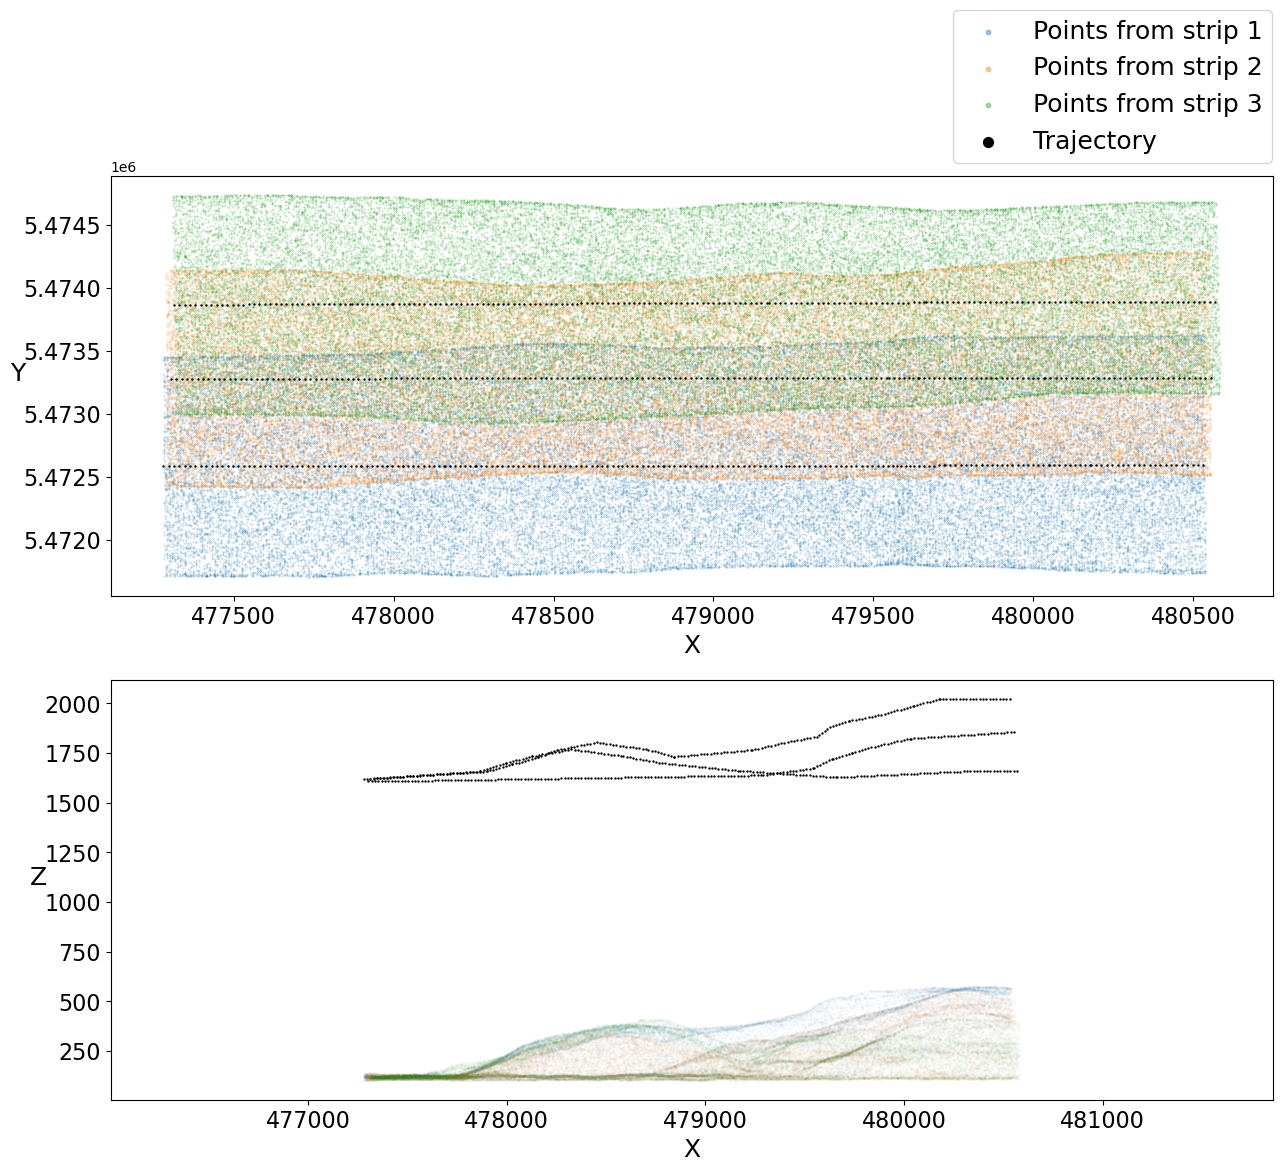

In [8]:
# two subplots
fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 12))

# view from above, colored by strip, including trajectory - for faster display, show only every 25th measurement
ax1.scatter(strip_1[::25, 0], strip_1[::25, 1], s=0.1, alpha=0.4, label="Points from strip 1") # select X and Y coordinates
ax1.scatter(strip_2[::25, 0], strip_2[::25, 1], s=0.1, alpha=0.4, label="Points from strip 2")
ax1.scatter(strip_3[::25, 0], strip_3[::25, 1], s=0.1, alpha=0.4, label="Points from strip 3")
ax1.scatter(traj[:, 0], traj[:, 1], s=0.5, label="Trajectory", color="black")
ax1.tick_params(labelsize=16)
ax1.set_xlabel('X', fontsize=18)
ax1.set_ylabel('Y', fontsize=18, rotation=0)
ax1.legend(fontsize=18, markerscale=10, loc="lower right", bbox_to_anchor=(1.01, 1))

# use only every 50th measurement for better display
ax2.scatter(strip_1[::50, 0], strip_1[::50, 2], alpha=0.05, s=0.1, label="Points from strip 1") # select X and Z coordinates
ax2.scatter(strip_2[::50, 0], strip_2[::50, 2], alpha=0.05, s=0.1, label="Points from strip 2")
ax2.scatter(strip_3[::50, 0], strip_3[::50, 2], alpha=0.05, s=0.1, label="Points from strip 3")
ax2.scatter(traj[:, 0], traj[:, 2], s=0.5, label="Trajectory", color="black")
ax2.tick_params(labelsize=16)
ax2.set_xlabel('X', fontsize=18)
ax2.set_ylabel('Z', fontsize=18, rotation=0)

plt.axis('equal')
#plt.legend(fontsize=18, markerscale=20)
plt.show()

In addition we can create a 3D plot.

In [9]:
def set_axes_equal(ax):
    """Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca()."""
    

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius]) 
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

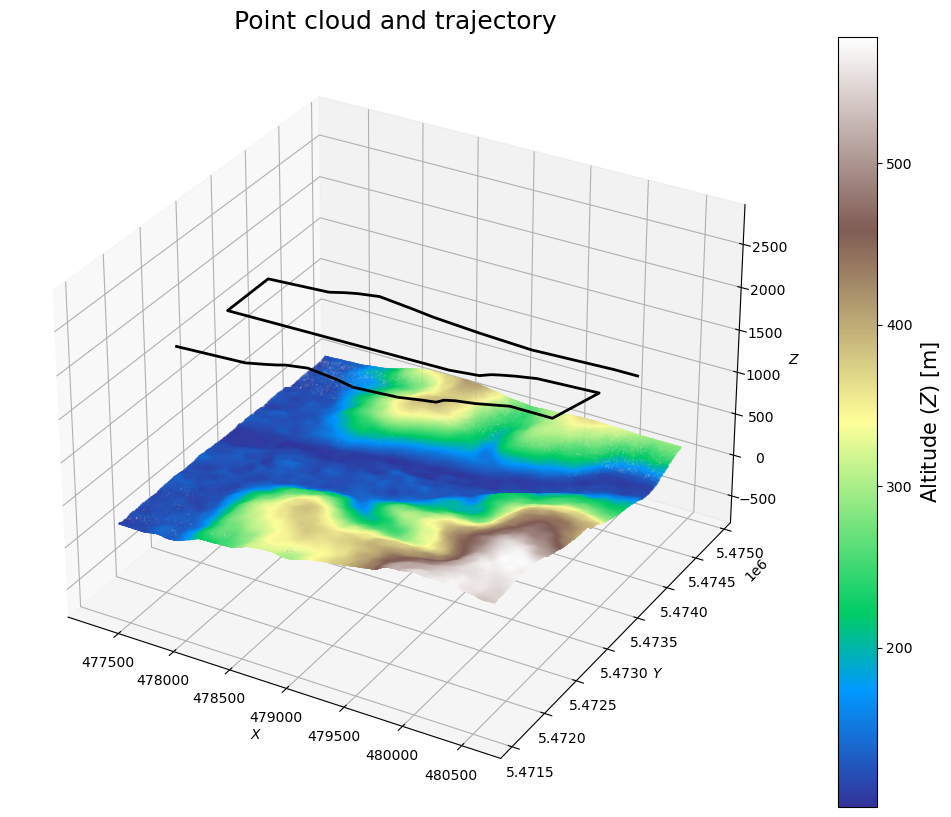

In [10]:
#stacking the strips 
strips= np.vstack((strip_1, strip_2, strip_3))

# Matplotlib figures.
fig = plt.figure(figsize=(15,10))

# Scatter plot of first scanner (coloured by height)
ax = fig.add_subplot(projection='3d', computed_zorder=False)  # do not use computed zorder, but let us define it ourselves
# only use every 5th point for faster display
sc = ax.scatter(strips[::5, 0], strips[::5, 1], strips[::5, 2], c=strips[::5, 2], cmap='terrain', s=0.05, zorder=1)

# Plot of trajectory.
ax.plot(traj[:,0], traj[:,1], traj[:,2], c='black', linewidth=2, zorder=2)


# Add axis labels.
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')

set_axes_equal(ax)    

# Set title.
ax.set_title(label='Point cloud and trajectory',fontsize=18)

cbar = plt.colorbar(sc)

cbar.set_label('Altitude ($Z$) [m]', fontsize=15)

# Display results
plt.show()